# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Graphiques illustrant le recueil

---

## Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns

### Chargement des données

In [3]:
recueil_filename = 'data/imports/221023-RecueilBrut.csv'

In [4]:
df_brut = pd.read_csv(recueil_filename)

In [5]:
df_brut

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signé,...,inversion de la preuve,invérifiable,titre décalé,dénigrement,cherry picking,degré infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné)
0,1.0,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,non,non,...,non,non,non,non,NaN,NaN,FB,NaN,NaN,NaN
1,1.0,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,oui,non,...,non,oui,non,non,NaN,1.0,FB,NaN,NaN,NaN
2,1.0,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,non,non,...,non,non,non,non,non,NaN,FB,NaN,NaN,NaN
3,2.0,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,oui,non,...,non,non,non,NaN,NaN,1.0,FB,vaccin,pseudo science,27 avril 22
4,3.0,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,oui,non,...,non,oui,oui,NaN,NaN,2.0,FB,vaccins,pseudo démonstration,mars 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39.0,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,non,non,...,non,non,non,non,NaN,NaN,CN,NaN,NaN,NaN
496,39.0,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,oui,non,...,oui,oui,non,oui,NaN,1.0,FB,NaN,NaN,NaN
497,39.0,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",oui,non,...,non,non,oui,non,NaN,1.0,FB,NaN,NaN,NaN
498,39.0,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,oui,non,...,non,non,non,non,NaN,2.0,FB,NaN,NaN,NaN


### Mise en forme des données

In [6]:
import patat.imp.labels

In [7]:
df_recueil = df_brut.rename(columns = patat.imp.labels.label_translator)

In [8]:
import urllib
def get_site(url):
    if type(url)==str:
        return urllib.parse.urlsplit(url).netloc

df_recueil.loc[:,'site'] = df_recueil['url'].apply(get_site)

In [9]:
df_recueil.value_counts('site')

site
www.francesoir.fr                     114
www.breizh-info.com                    50
lesmoutonsrebelles.com                 41
www.wikistrike.com                     39
lezarceleurs.blogspot.com              32
lesdeqodeurs.fr                        23
lemediaen442.fr                        20
www.dreuz.info                         16
www.profession-gendarme.com            15
fr.sott.net                            14
www.mondialisation.ca                  13
www.polemia.com                        12
reseauinternational.net                11
www.nouvelordremondial.cc              10
www.lelibrepenseur.org                 10
www.lesalonbeige.fr                     9
www.voltairenet.org                     9
infodujour.fr                           5
lecourrier-du-soir.com                  5
www.les-crises.fr                       5
lesobservateurs.ch                      5
www.preuvesduparanormal.fr              5
lesakerfrancophone.fr                   5
www.cnews.fr                 

In [10]:
import numpy as np

def normalize_label(value):
    if type(value) != str:
        return np.NaN
    elif value == 'oui':
        return 1.0
    elif value =='non' :
        return 0.0
    else:
        return np.NaN

In [11]:
df_recueil=df_recueil.rename(columns=patat.imp.labels.label_translator)

In [12]:
df_recueil.keys()

Index(['# site', '# article', 'Site', 'url', 'Auteur/trice', 'Date', 'Titre',
       'Explication (pour les infox seulement)', 'infox', 'signe',
       'entites_nommees', 'entites_coherentes', 'ouverture_esprit',
       'qualite_ecriture', 'intention', 'faits', 'opinions', 'propos_raportes',
       'sources_citees', 'fausse_nouvelle', 'insinuations', 'exageration',
       'scientifique_sulfureux', 'trop_mots', 'trop_chiffres', 'sophisme',
       'inversion_preuve', 'inverifiable', 'titre_decale', 'denigrement',
       'cherry_picking', 'degre_infox', 'observateur', 'thème (abandonné)',
       'type infox (abandonné)', 'Date de collection (abandonné)', 'site'],
      dtype='object')

In [13]:
for label in patat.imp.labels.short_label_names:
    df_recueil[label]=df_recueil[label].apply(normalize_label)

#df_recueil = df_recueil.convert_dtypes()

for label in patat.imp.labels.short_label_names:
    print(label,df_recueil[label].isna().sum())

infox 1
signe 1
entites_nommees 0
entites_coherentes 0
ouverture_esprit 1
qualite_ecriture 2
faits 0
opinions 0
fausse_nouvelle 1
insinuations 2
exageration 261
scientifique_sulfureux 2
trop_mots 1
trop_chiffres 1
sophisme 1
inversion_preuve 1
inverifiable 1
propos_raportes 1
sources_citees 1
titre_decale 1
denigrement 351
cherry_picking 475


In [14]:
df_recueil

,# site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signe,...,inverifiable,titre_decale,denigrement,cherry_picking,degre_infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné),site
0,1.0,1,Anguille sous roche,https://www.anguillesousroche.com/actualite/ou...,NaN,28/09/2022,"Ouverture du gazoduc Baltic Pipe, qui relie la...",NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com
1,1.0,2,Anguille sous roche,https://www.anguillesousroche.com/technologie/...,NaN,30/09/2022,La CIA aurait investi dans une puissante techn...,ils rêvent et font de l'enfumage sur CRISPR,1.0,0.0,...,1.0,0.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.anguillesousroche.com
2,1.0,3,Anguille sous roche,https://www.anguillesousroche.com/actualite/ju...,NaN,04/10/2022,"Jusqu’à présent, seuls 9 des 30 États membres ...",NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,FB,NaN,NaN,NaN,www.anguillesousroche.com
3,2.0,4,bonsens.org,https://bonsens.info/essais-pfizer-sur-le-vacc...,NaN,02/01/2022,Essais Pfizer sur le vaccin anti-covid : le ra...,pseudo rapport par une pseudo scientifique mon...,1.0,0.0,...,0.0,0.0,NaN,NaN,1.0,FB,vaccin,pseudo science,27 avril 22,bonsens.info
4,3.0,5,breizh,https://www.breizh-info.com/2022/02/23/180457/...,NaN,23/02/2022,Tests – vaccins – pass : fabrique de la paniqu...,yapa de pandémie et les vaccins ne marchent pas,1.0,0.0,...,1.0,1.0,NaN,NaN,2.0,FB,vaccins,pseudo démonstration,mars 22,www.breizh-info.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39.0,496,Wikistrike,https://www.wikistrike.com/2022/08/l-un-des-pl...,NaN,24/08/2022,L’un des plus grands complexes mégalithiques d...,NaN,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,CN,NaN,NaN,NaN,www.wikistrike.com
496,39.0,497,Wikistrike,https://www.wikistrike.com/2022/09/les-command...,NaN,02/09/2022,Les commandos ukrainiens qui ont attaqué la ce...,les Ukrainiens ont essayé de faire échouer la ...,1.0,0.0,...,1.0,0.0,1.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com
497,39.0,498,Wikistrike,https://www.wikistrike.com/2022/09/coupures-el...,NaN,29/09/2022,Coupures électriques imminentes en France,"l'article de Reuters ne dit pas ça, il dit que...",1.0,0.0,...,0.0,1.0,0.0,NaN,1.0,FB,NaN,NaN,NaN,www.wikistrike.com
498,39.0,499,Wikistrike,https://www.wikistrike.com/2022/09/11-septembr...,NaN,29/09/2022,11 septembre 2001 : La théorie du « complot pi...,les gens qui disent que 9/11 était un complot ...,1.0,0.0,...,0.0,0.0,0.0,NaN,2.0,FB,NaN,NaN,NaN,www.wikistrike.com


## Expérience
---

### Distribution sites

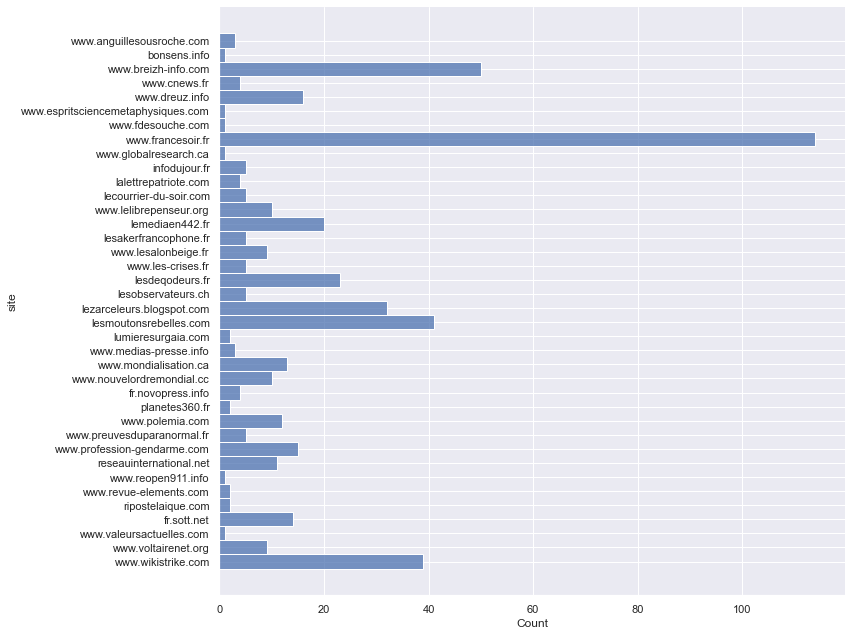

In [15]:
df_plot = df_recueil
sns.set(rc={'figure.figsize':(4,3)})
plot = sns.displot(data=df_plot, y='site',height=9, aspect=4/3)

### infox / non infox

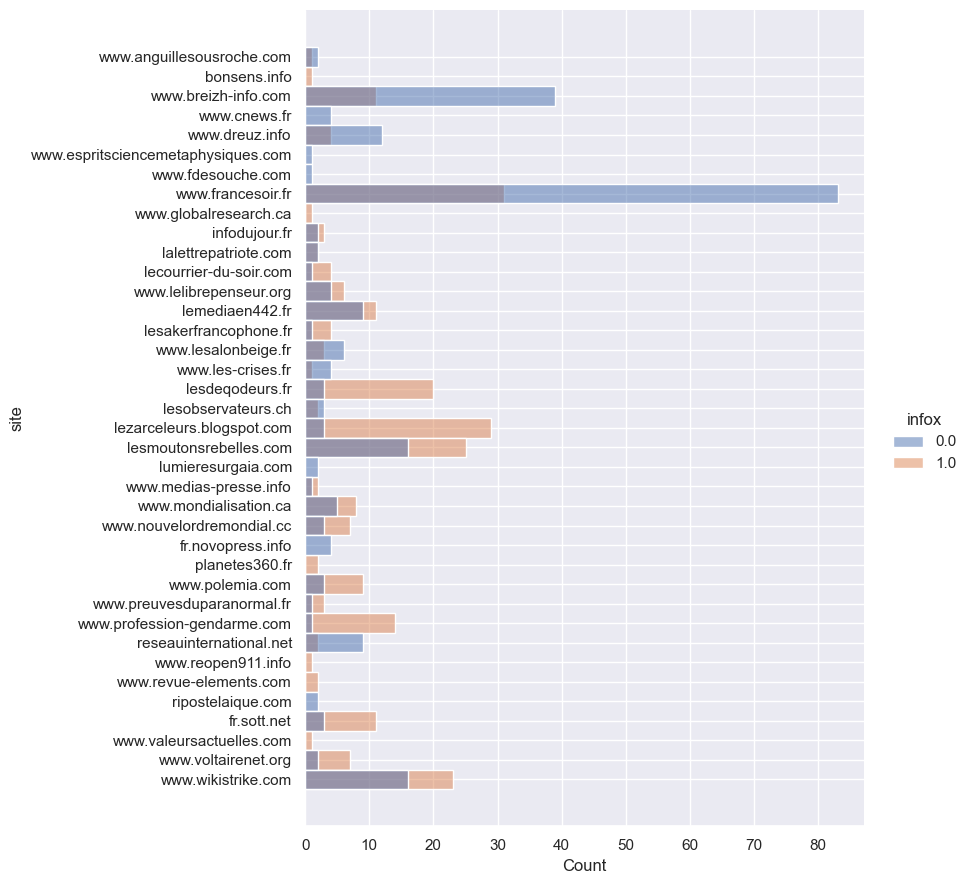

In [16]:
label='infox'
df_plot = df_recueil[df_recueil[label].notna()]
sns.set(rc={'figure.figsize':(4,3)})
plot = sns.displot(data=df_plot, y='site', hue=label, height=9, aspect=1)

In [ ]:
df_recueil[patat.imp.labels.short_label_names].sum()

In [68]:
df_plot = df_recueil.pivot_table(index='site',aggfunc='mean')[patat.imp.labels.short_label_names]
#df_plot = df_recueil.pivot_table(index='site',aggfunc='sum')[['infox','signe','faits','opinions']]
df_plot

,infox,signe,entites_nommees,entites_coherentes,ouverture_esprit,qualite_ecriture,faits,opinions,fausse_nouvelle,insinuations,...,trop_mots,trop_chiffres,sophisme,inversion_preuve,inverifiable,propos_raportes,sources_citees,titre_decale,denigrement,cherry_picking
site,,,,,,,,,,,,,,,,,,,,,
bonsens.info,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,NaN,NaN
fr.novopress.info,0.00,1.00,0.25,0.25,0.25,1.00,0.50,1.00,0.00,0.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,NaN
fr.sott.net,0.79,0.64,0.50,0.50,0.00,0.93,0.50,0.50,0.21,0.64,...,0.14,0.00,0.07,0.07,0.21,0.43,0.43,0.29,0.00,NaN
infodujour.fr,0.60,0.60,0.40,0.40,0.00,1.00,0.20,0.20,0.20,0.40,...,0.00,0.00,0.20,0.00,0.40,0.40,0.40,0.00,NaN,NaN
lalettrepatriote.com,0.50,1.00,0.75,0.75,0.00,1.00,0.75,1.00,0.00,0.75,...,0.00,0.00,0.25,0.25,0.25,0.25,0.75,0.25,NaN,NaN
lecourrier-du-soir.com,0.80,1.00,0.80,0.80,0.00,1.00,1.00,1.00,0.00,0.60,...,0.00,0.00,0.20,0.00,0.00,0.40,0.80,0.80,0.00,0.00
lemediaen442.fr,0.55,0.05,0.75,0.80,0.10,1.00,0.85,0.75,0.20,0.70,...,0.00,0.00,0.00,0.05,0.05,0.20,0.55,0.30,0.30,0.00
lesakerfrancophone.fr,0.80,1.00,1.00,1.00,0.00,1.00,0.40,1.00,0.20,0.80,...,0.00,0.00,0.00,0.00,0.80,0.60,0.40,0.20,0.75,NaN
lesdeqodeurs.fr,0.87,0.09,0.39,0.35,0.00,1.00,0.48,0.39,0.17,0.65,...,0.43,0.04,0.04,0.17,0.35,0.26,0.30,0.09,0.14,0.00


<AxesSubplot:ylabel='site'>

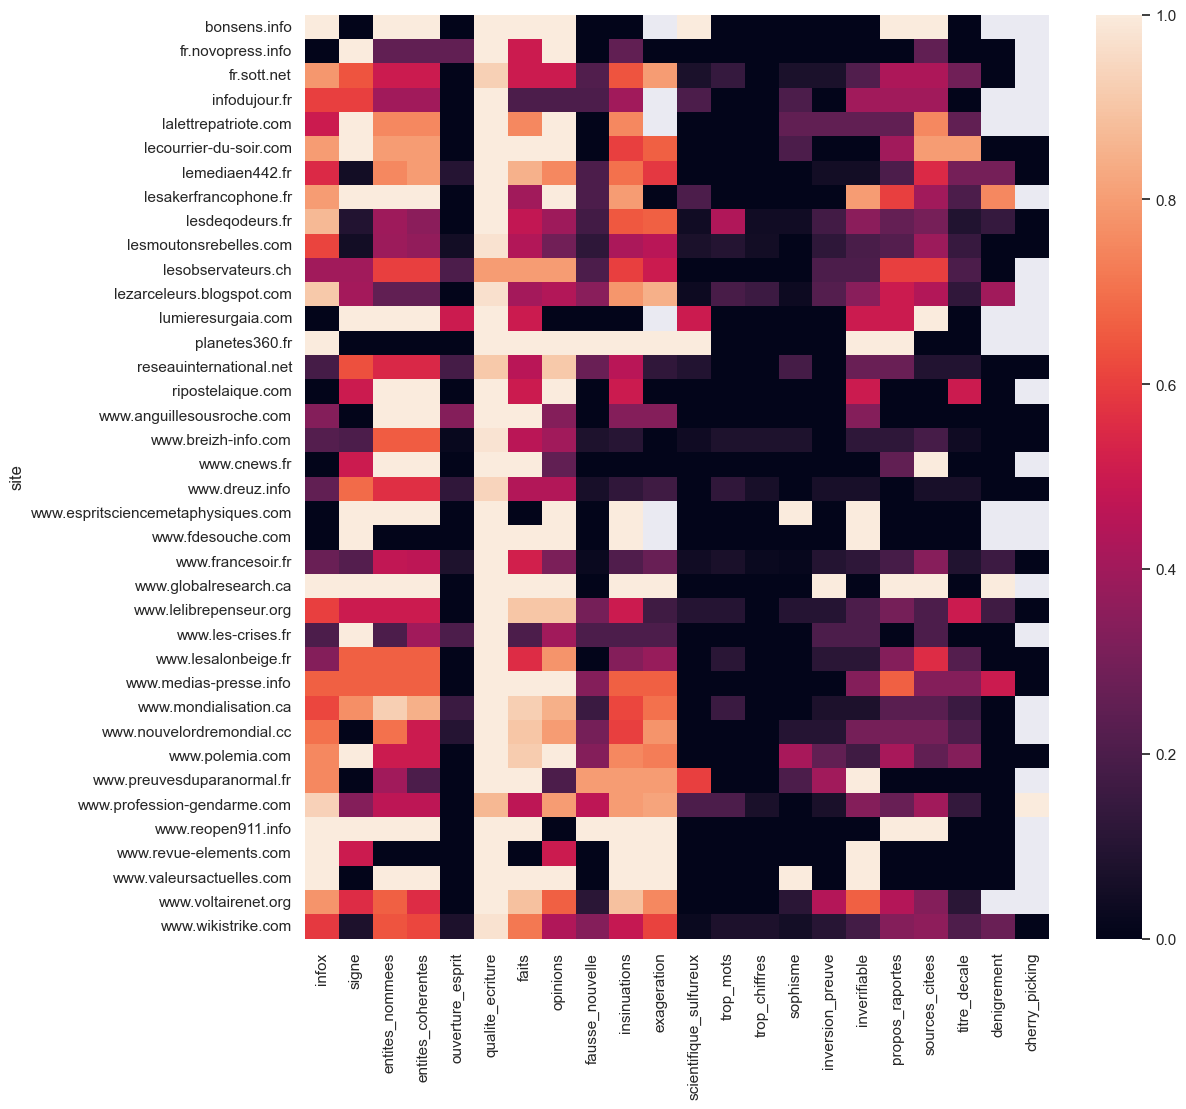

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=df_plot,vmax=1)

In [71]:
pd.options.display.float_format = '{:,.2f}'.format
df_plot = df_recueil[patat.imp.labels.short_label_names].pivot_table(columns='infox',aggfunc='sum')
#df_plot = df_recueil.pivot_table(index='site',aggfunc='sum')[['infox','signe','faits','opinions']]
#df_plot.drop(index=['# article','# site'])
df_plot = df_plot[[1.0,0.0]]
df_plot['ecart']=(df_plot[1]-df_plot[0])
df_plot['total']=df_plot[1]+df_plot[0]
df_plot['freq_1']=df_plot[1]/df_plot['total']
df_plot['freq_0']=df_plot[0]/df_plot['total']
df_plot['freq_e']=df_plot['ecart']/df_plot['total']
df_plot = df_plot.sort_values('ecart',ascending=False)
df_plot

infox,1.0,0.0,ecart,total,freq_1,freq_0,freq_e
insinuations,196.00,23.00,173.00,219.00,0.89,0.11,0.79
exageration,109.00,7.00,102.00,116.00,0.94,0.06,0.88
fausse_nouvelle,80.00,2.00,78.00,82.00,0.98,0.02,0.95
inverifiable,90.00,16.00,74.00,106.00,0.85,0.15,0.70
propos_raportes,101.00,28.00,73.00,129.00,0.78,0.22,0.57
sources_citees,118.00,51.00,67.00,169.00,0.70,0.30,0.40
titre_decale,60.00,11.00,49.00,71.00,0.85,0.15,0.69
opinions,148.00,104.00,44.00,252.00,0.59,0.41,0.17
inversion_preuve,47.00,4.00,43.00,51.00,0.92,0.08,0.84
trop_mots,43.00,3.00,40.00,46.00,0.93,0.07,0.87


<AxesSubplot:xlabel='freq_1', ylabel='freq_0'>

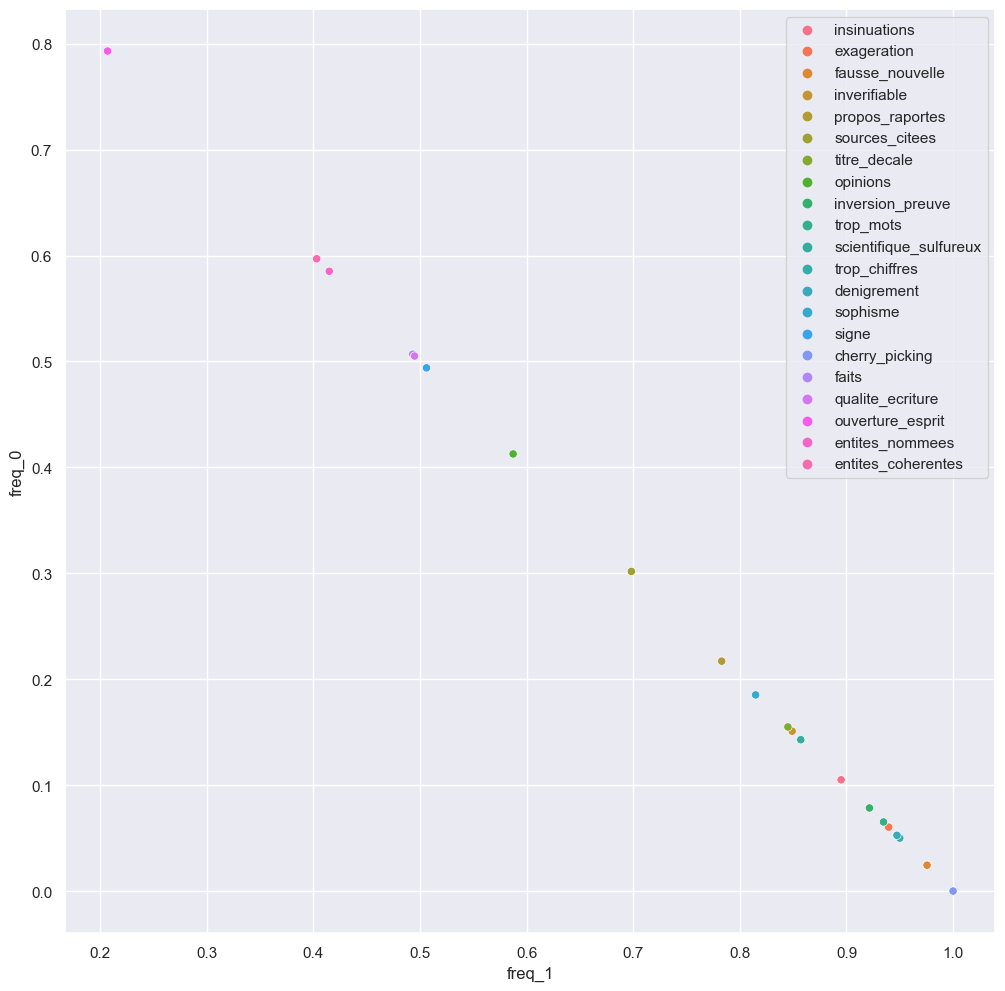

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data=df_plot,x='freq_1',y='freq_0',hue=df_plot.index)

<AxesSubplot:xlabel='ecart'>

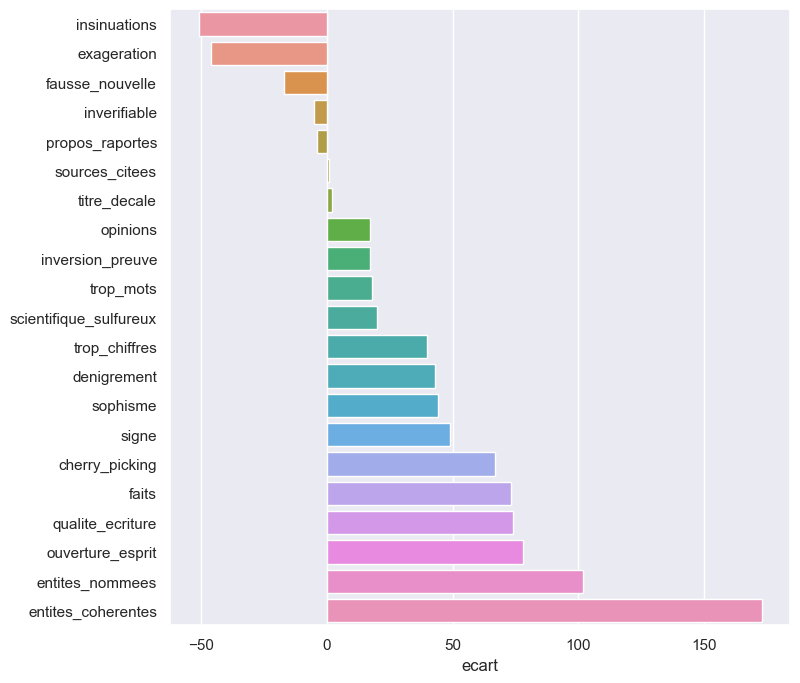

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_plot.sort_values('ecart'),y=df_plot.index,x='ecart')

<AxesSubplot:xlabel='freq_0'>

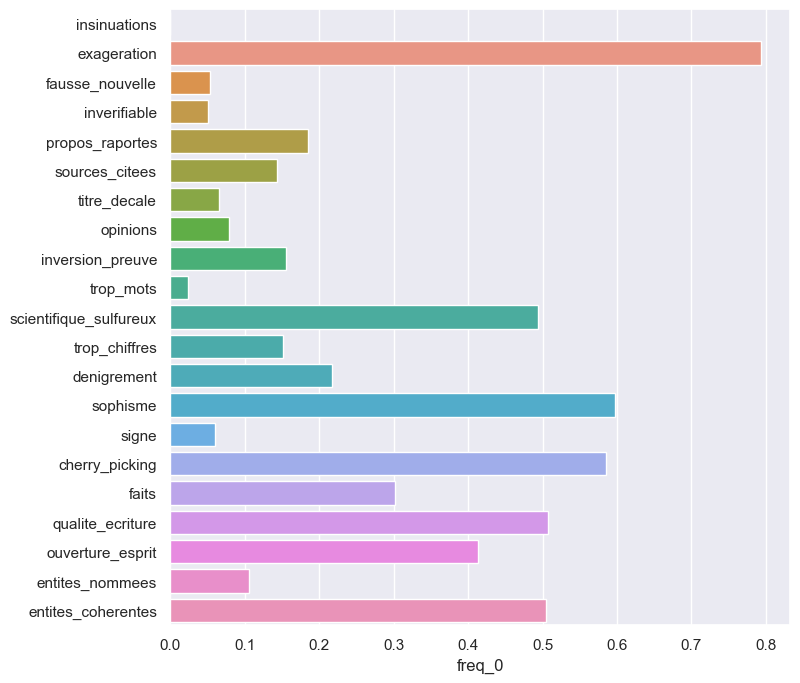

In [74]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_plot.sort_values(1.0),y=df_plot.index,x='freq_0')

## Mesure et observation des résultats
---

## Sauvegarde des résultats
---

## Conclusions
---

- Résultat : OK

## Bricolages
---

In [ ]:
!pip3 install --upgrade pip